In [5]:
library(ggplot2)
library(ggthemes)
library(Bolstad2)
options(repr.plot.width = 18, repr.plot.height = 10)

## Exercise 1
A researcher has collected n = 15 observations that are supposed to come from a Normal distribution with known variance $\sigma^2 = 16$

    26.8 26.3 28.3 28.5 16.3
    31.9 28.5 27.2 20.9 27.5
    28.0 18.6 22.3 25.0 31.5

Assuming a normal prior for µ, $Norm(m = 20, s^2 = 25)$,


(a) determine the posterior distribution P(µ|y1 . . . y15) and find the posterior mean and standard deviation.

In [9]:
#data
mu <- c(26.8,26.3,  28.3,  28.5, 16.3, 31.9, 28.5, 27.2, 20.9, 27.5,28.0, 18.6, 22.3, 25.0 ,31.5)
n <- length(mu)

In [10]:
#the prior is given by 
mu <- seq(0,50, 0.01)
m <- 20
sd2 <- 25
prior <- exp(-(1/(2*sd2))*(mu - m)**2)
prior <- prior/(0.01*sum(prior))

#The likelihood
sigma2 <- 16 
mu.mean <- mean(mu)
likelihood <- exp(-(n/(2*sigma2))*(mu.mean - mu)**2)
likelihood <- likelihood/(0.01*sum(likelihood))

#The posterior is given by the product of the likelihood and the prior
posterior_manual <- prior * likelihood
posterior_manual <- posterior_manual/(0.01*sum(posterior_manual))

In [11]:
#The mean value is given by:
post_mean <- sum(mu * posterior_manual*0.01)#integrate(beta_, 0, 1)$value

#variance 
var <- sum((mu*mu*posterior_manual*0.01))
sd2_post <- var - post_mean**2

#theoretically the the posterior is a normal distribution with mean and variance given by the formulas
sd2.teo.post <- (sigma2*sd2)/ (sigma2+n*sd2)
mean.teo.post <- ((1/sd2)/(n/sigma2 + 1/sd2)) * m + ((n/sigma2)/(n/sigma2+1/sd2))*mu.mean

cat(paste("The mean value obtained  by the distribution is: "
          ,round(post_mean,4)," with variance ",round(sd2_post,4),"\n",sep=""))

cat(paste("The mean value obtained theoretically by using the formula is: "
          ,round(mean.teo.post,4)," with variance ",round(sd2.teo.post,4),"\n",sep=""))


The mean value obtained  by the distribution is: 24.7954 with variance 1.023
The mean value obtained theoretically by using the formula is: 24.7954 with variance 1.023


(b) find the 95% credibility interval for µ

In [5]:
z <- qnorm(0.975)
lb_norm <- post_mean - z * sqrt(sd2_post)
ub_norm <- post_mean + z * sqrt(sd2_post)

cat(paste("Approximate normal 95% credible interval: ["
          ,round(lb_norm,4)," ",round(ub_norm,4),"]\n",sep=""))

Approximate normal 95% credible interval: [22.813 26.7778]


(c) plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation, and the 95% credibility interval


Warning message:
"Removed 4000 rows containing missing values (position_stack)."

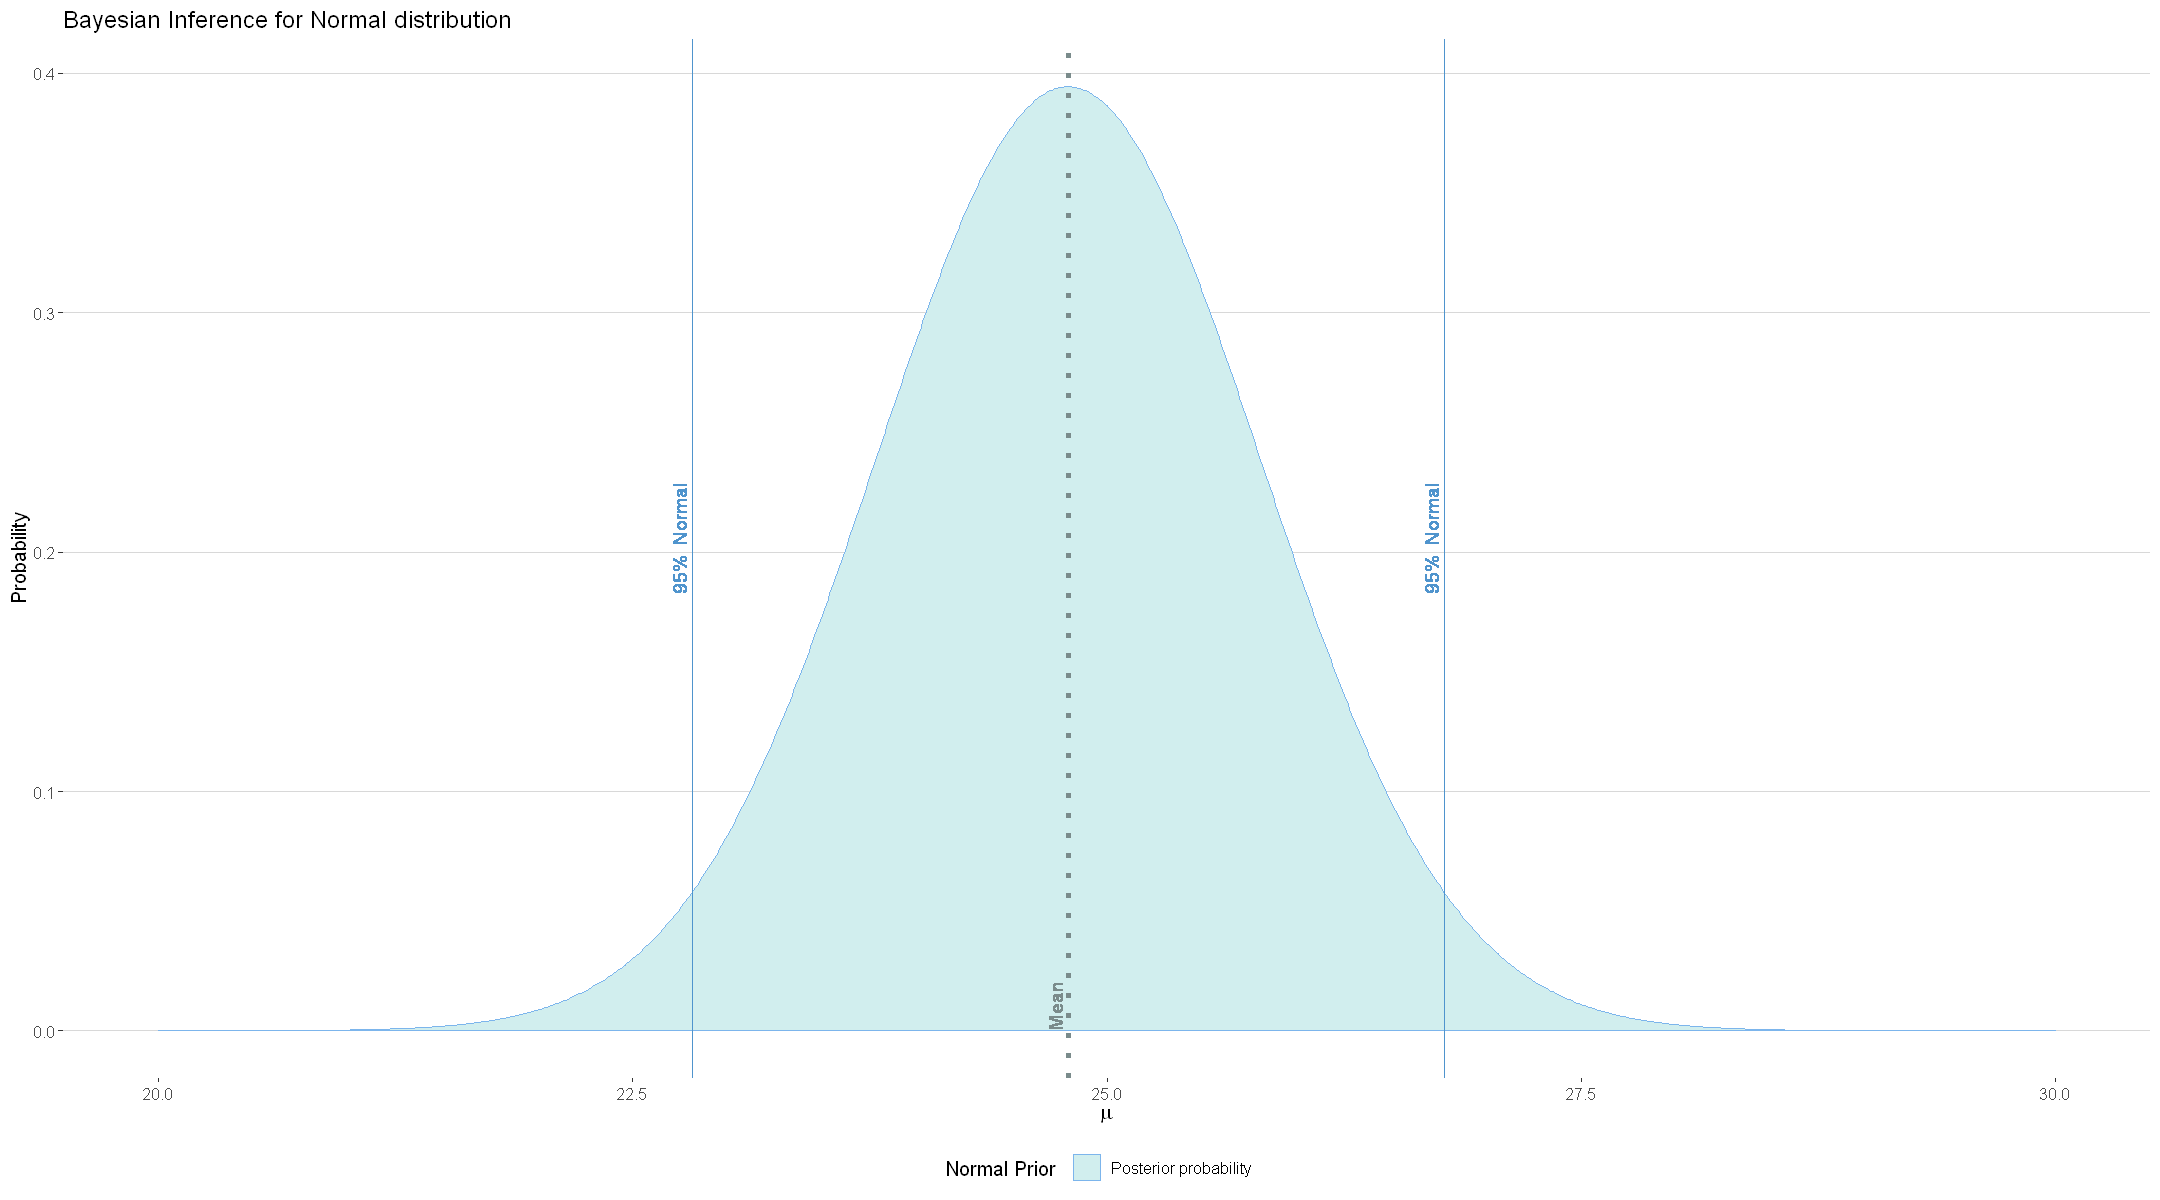

In [6]:
df <- data.frame(mu, posterior_manual)
g <-ggplot(df, aes(x=mu, y = posterior_manual, col = 'Posterior probability')) 
g <- g +  geom_area(fill="lightcyan2")  
g <- g +  labs( y="Probability", x = expression(mu), col = 'Normal Prior')  + xlim(c(20,30))
g <- g + ggtitle("Bayesian Inference for Normal distribution")+ theme_hc()+ scale_colour_hc()
g <- g +  geom_vline(xintercept = post_mean, colour="lightcyan4", linetype="dotted", size = 1.5)
g <- g + geom_text(mapping=aes(x=post_mean, y=0,label="Mean"),colour="lightcyan4", size=4, angle=90, vjust=-0.4, hjust=0)
g <- g +  geom_vline(xintercept = lb_norm, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=lb_norm, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g <- g +  geom_vline(xintercept = ub_norm, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=ub_norm, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g

(d) repeat the analysis using a different prior Norm(m = 30, s2 = 16) and plot, on the same graph the likelihood, the prior and the posterior.


In [7]:
m <- 30
sd2 <- 16
prior <- exp(-(1/(2*sd2))*(mu - m)**2)
prior <- prior/(0.01*sum(prior))

#likelihood
sigma2 <- 16 
mu.mean <- mean(mu)
likelihood <- exp(-(n/(2*sigma2))*(mu.mean - mu)**2)
likelihood <- likelihood/(0.01*sum(likelihood))

#posterior 
posterior_manual <- prior * likelihood
posterior_manual <- posterior_manual/(0.01*sum(posterior_manual)) 

In [8]:
post_mean_2 <- sum(mu * posterior_manual*0.01)#integrate(beta_, 0, 1)$value

var <- sum((mu*mu*posterior_manual*0.01))
sd2_post_2 <- var - post_mean_2**2

#the posterior is a normal distribution with mean and variance given by the formulas of the theoric
sd2.form.post <- (sigma2*sd2)/ (sigma2+n*sd2)
mean.form.post <- ((1/sd2)/(n/sigma2 + 1/sd2)) * m + ((n/sigma2)/(n/sigma2+1/sd2))*mu.mean


cat(paste("The mean value obtained  by the distribution is: "
          ,round(post_mean_2,4)," with variance ",round(sd2_post_2,4),"\n",sep=""))

cat(paste("The mean value obtained  by using the formula is: "
          ,round(mean.form.post,4)," with variance ",round(sd2.form.post,4),"\n",sep=""))

z <- qnorm(0.975)
lb_norm_2 <- post_mean_2 - z * sqrt(sd2_post_2)
ub_norm_2 <- post_mean_2 + z * sqrt(sd2_post_2)

cat(paste("Approximate normal 95% credible interval: ["
          ,round(lb_norm_2,4)," ",round(ub_norm_2,4),"]\n",sep=""))

The mean value obtained  by the distribution is: 25.3125 with variance 1
The mean value obtained  by using the formula is: 25.3125 with variance 1
Approximate normal 95% credible interval: [23.3525 27.2725]


Warning message:
"Removed 4000 rows containing missing values (geom_path)."Warning message:
"Removed 4000 rows containing missing values (geom_path)."Warning message:
"Removed 4000 rows containing missing values (geom_path)."

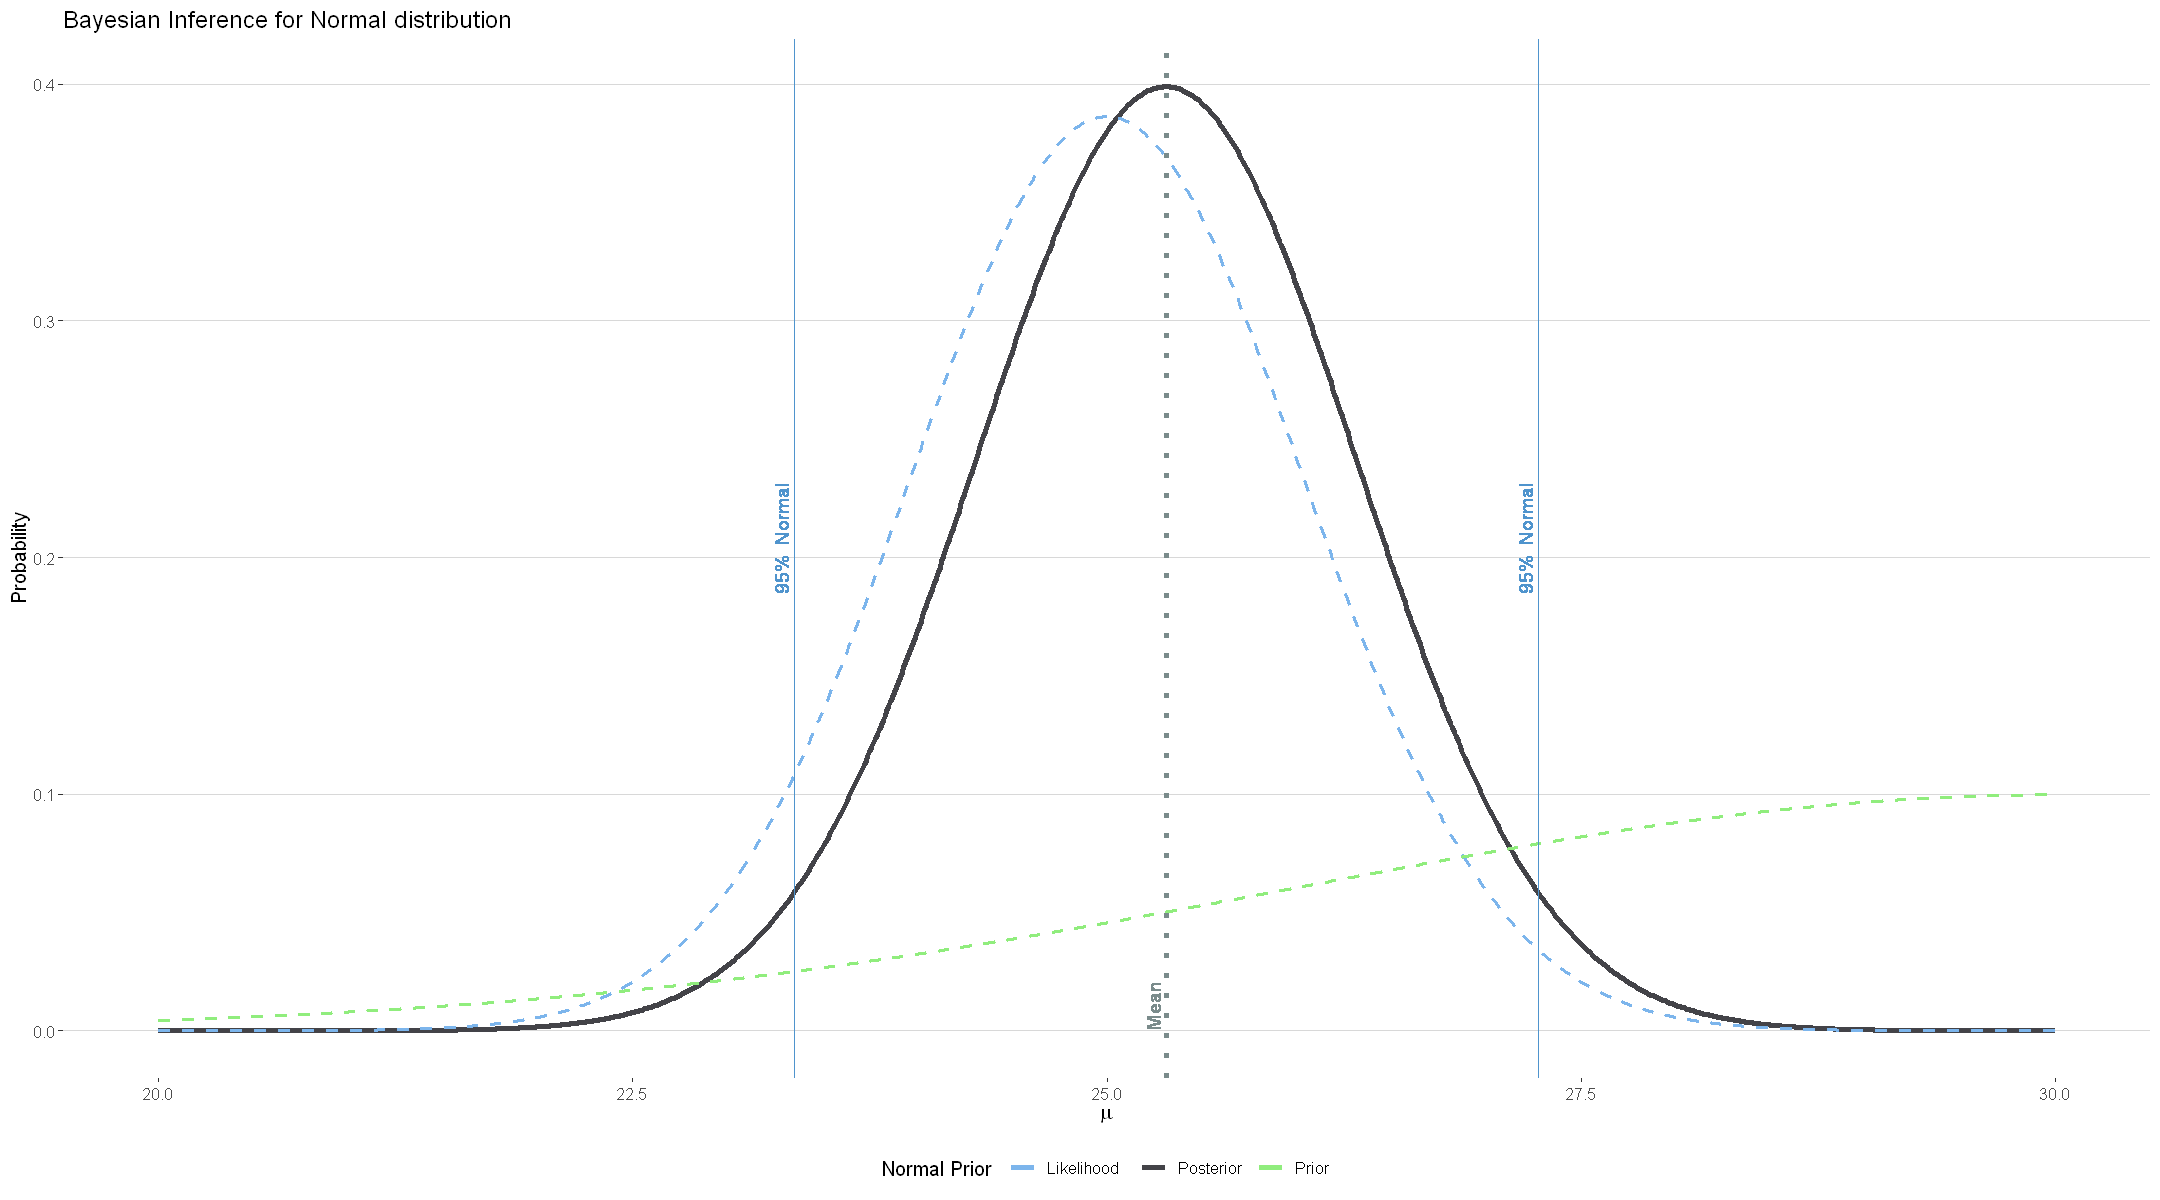

In [9]:
df <- data.frame(mu, posterior_manual, likelihood, prior)
g <-ggplot(df, aes(x=mu, y = posterior_manual, col = 'Posterior')) 
g <- g +  geom_line(size = 1.5)  
g <- g + geom_line(aes(x=mu, y =likelihood, col = 'Likelihood'),  linetype="dashed", size = 1)
g <- g + geom_line(aes(x=mu, y =prior, col = 'Prior'), linetype="dashed", size = 1)
g <- g +  labs( y="Probability", x = expression(mu), col = 'Normal Prior')  + xlim(c(20,30))
g <- g + ggtitle("Bayesian Inference for Normal distribution")+ theme_hc()+ scale_colour_hc()
g <- g +  geom_vline(xintercept = post_mean_2, colour="lightcyan4", linetype="dotted", size = 1.5)
g <- g + geom_text(mapping=aes(x=post_mean_2, y=0,label="Mean"),colour="lightcyan4", size=4, angle=90, vjust=-0.4, hjust=0)
g <- g +  geom_vline(xintercept = lb_norm_2, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=lb_norm_2, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g <- g +  geom_vline(xintercept = ub_norm_2, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=ub_norm_2, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g


(e) compare the credibility intervals obtained with the two priors

In [10]:
z <- qnorm(0.975)
cat(paste("Value of mean in a): "
          ,round(post_mean,4)," +/-",round(z * sqrt(sd2_post),4),"\n",sep=""))

cat(paste("Value of mean in d): "
          ,round(post_mean_2,4)," +/-",round(z * sqrt(sd2_post_2),4),"\n",sep=""))

cat("The confidence interval disminuish in point d)")

Value of mean in a): 24.7954 +/-1.9824
Value of mean in d): 25.3125 +/-1.96
The confidence interval disminuish in point d)

## Exercise 2

A researcher has collected n = 16 observations that are supposed to come from a Normal distribution
with known variance  $\sigma^2 = 4$

    4.09 4.68 1.87 2.62 5.58 8.68 4.07 4.78
    4.79 4.49 5.85 5.09 2.40 6.27 6.30 4.47


assuming the prior is a step funtion:

 $ 
    g(\mu) = \left\{\begin{array}{lr}
        \mu , & \text{for } 0\leq \mu\leq 3\\
        3 , & \text{for } 3\leq \mu\leq 5\\
        8- \mu , & \text{for } 5\leq \mu\leq 8\\
        0, & \text{for } \mu \geq 8\\
\end{array}\right\} $

(a) find the posterior distribution, the posterior mean and standard deviation


In [11]:
mu <- c(4.09,  4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78, 4.79 ,4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47)
n <- length(mu)
mu.mean <- mean(mu)

In [12]:
prior.function <- function (x){
    result <- c()
    for (i in x){
        val <- if (i >= 0 & i < 3){
                             i }
                
               else if (i >= 3 & i < 5){
                            3 }
               else if (i >= 5 & i < 8){
                            8 - i }
              else 0
        result <- c(result, val)}
    return(result)}

In [13]:
mu <- seq(0,10,0.01)
prior <- prior.function(mu)
prior <- prior/(0.01*sum(prior))

In [14]:
#likelihood
sigma2 <- 16 
mu.mean <- mean(mu)
likelihood <- exp(-(n/(2*sigma2))*(mu.mean - mu)**2)
likelihood <- likelihood/(0.01*sum(likelihood))

In [ ]:
#posterior 
posterior_manual <- prior * likelihood 
posterior_manual <- posterior_manual/(0.01*sum(posterior_manual))

post_mean <- sum(mu * posterior_manual*0.01)#integrate(beta_, 0, 1)$value

var <- sum((mu*mu*posterior_manual*0.01))
sd2_post <- var - post_mean**2

cat(paste("The mean value obtained  by the distribution is: "
          ,round(post_mean,4)," with variance ",round(sd2_post,4),"\n",sep=""))

The mean value obtained  by the distribution is: 4.8165 with variance 0.7933


(b) find the 95% credibility interval for µ


In [ ]:
#Calculating the 95% interval
cdf <- sintegral(mu, posterior_manual)

d<-abs(cdf$y-0.025)
lb<-cdf$x[max((1:length(cdf$y))[d==min(d)])]

d<-abs(cdf$y-0.975)
ub<-cdf$x[min((1:length(cdf$y))[d==min(d)])]

cat(paste("Approximate 95% credible interval for Unif : ["
          ,round(lb,4)," ",round(ub,4),"]\n",sep=""))


(c) plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation,
and the 95% credibility interval


In [ ]:
df <- data.frame(mu, posterior_manual)
g <-ggplot(df, aes(x=mu, y = posterior_manual, col = 'Posterior probability')) 
g <- g +  geom_area(fill="lightcyan2")  
g <- g +  labs( y="Probability", x = expression(mu), col = 'Normal Prior')  + xlim(c(0,10))
g <- g + ggtitle("Bayesian Inference for Normal distribution")+ theme_hc()+ scale_colour_hc()
g <- g +  geom_vline(xintercept = post_mean, colour="lightcyan4", linetype="dotted", size = 1.5)
g <- g + geom_text(mapping=aes(x=post_mean, y=0,label="Mean"),colour="lightcyan4", size=4, angle=90, vjust=-0.4, hjust=0)
g <- g +  geom_vline(xintercept = lb, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=lb, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g <- g +  geom_vline(xintercept = ub, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=ub, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g

(d) plot, on the same graph, the prior, the likelihood and the posterior distribution


In [ ]:
df <- data.frame(mu, posterior_manual, likelihood, prior)
g <-ggplot(df, aes(x=mu, y = posterior_manual, col = 'Posterior')) 
g <- g +  geom_line(size = 1.5)  
g <- g + geom_line(aes(x=mu, y =likelihood, col = 'Likelihood'),  linetype="dashed", size = 1)
g <- g + geom_line(aes(x=mu, y =prior, col = 'Prior'), linetype="dashed", size = 1)
g <- g +  labs( y="Probability", x = expression(mu), col = 'Normal Prior')  + xlim(c(0,10))
g <- g + ggtitle("Bayesian Inference for Normal distribution")+ theme_hc()+ scale_colour_hc()
g <- g +  geom_vline(xintercept = post_mean, colour="lightcyan4", linetype="dotted", size = 1.5)
g <- g + geom_text(mapping=aes(x=post_mean, y=0,label="Mean"),colour="lightcyan4", size=4, angle=90, vjust=-0.4, hjust=0)
g <- g +  geom_vline(xintercept = lb, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=lb, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g <- g +  geom_vline(xintercept = ub, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=ub, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g

## Exercise 3
 A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental
impact on pandas. Out of these, y = 11 had a high bacter X level.

 indicating with p the probability that a sample of water taken from the stream has a high bacter X level,

(a) find the frequentist estimator for p



In [ ]:
y <- 11
n <- 116

p_estimator <- y/n

cat(paste("The  frequentist estimator for p is "
          ,round(p_estimator,4), "\n",sep=""))

(b) using a Beta(1, 10) prior for p, calculate and posterior distribution 
P(p| y)


In [21]:
#beta prior Beta(a, b)
p <- seq(0,1, 0.01)
a <- 1
b <- 10

beta_prior <- dbeta(p, a, b)

p.likelihood <- dbinom(x = y, size = n, prob = p)
p.likelihood <- p.likelihood /(0.01 *sum(p.likelihood ))

beta_posterior <- p.likelihood * beta_prior# / integrate(beta_, 0, 1)$value
beta_posterior <- beta_posterior / (0.01*sum(beta_posterior))

#wich is nothing else as (theoretically)
aa <- a +y
bb <- b + n - y
beta <- dbeta(p, aa, bb)

Warning message:
"Removed 70 rows containing missing values (position_stack)."Warning message:
"Removed 70 rows containing missing values (geom_path)."

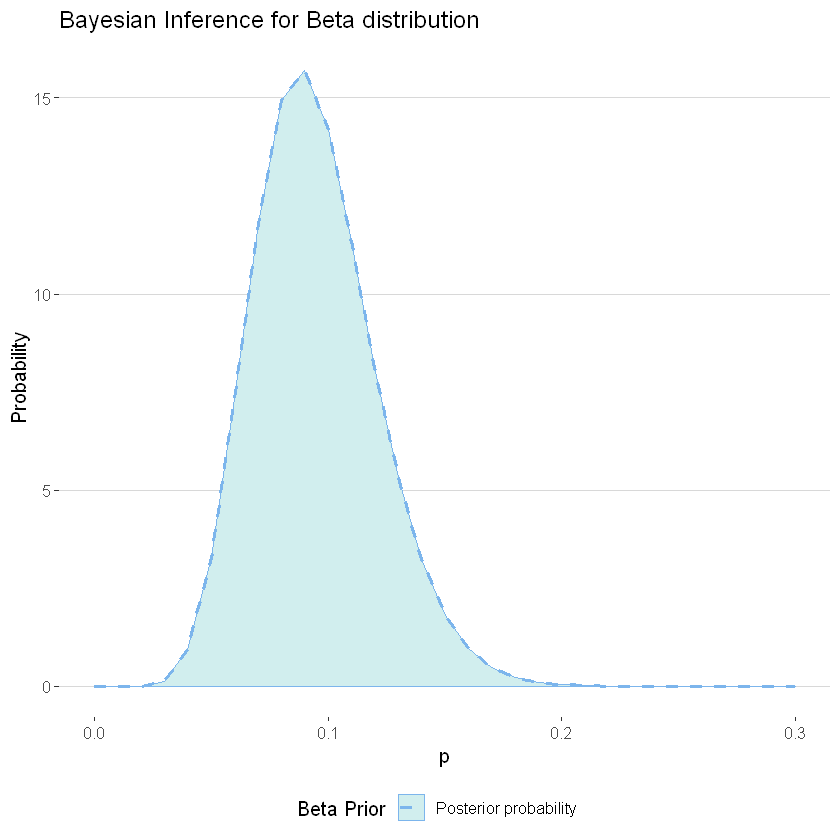

In [22]:
df <- data.frame(p, beta_posterior)
g <-ggplot(df, aes(x=p, y = beta_posterior, col = 'Posterior probability')) 
g <- g +  geom_area(fill="lightcyan2")  
g <- g + geom_line(aes(x=p, y =beta),  linetype="dashed", size = 1)
g <- g +  labs( y="Probability", x = "p", col = 'Beta Prior')  + xlim(c(0,0.3))
g <- g + ggtitle("Bayesian Inference for Beta distribution")+ theme_hc()+ scale_colour_hc()
g


(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval



In [23]:
#bayesian estimator for p 
p_b <- aa/(aa+bb)

cat(paste("The bayesian estimator for p  is "
          ,round(p_b,4), "\n",sep="")) 

The bayesian estimator for p  is 0.0945


In [24]:
post_mean <- sum(p * beta_posterior*0.01)
var <- sum((p*p*beta_posterior*0.01))
sd2_post <- var - post_mean**2

cat(paste("The mean value obtained  by the distribution is "
          ,round(post_mean,4)," with variance ",round(sd2_post,4),"\n",sep=""))

The mean value obtained  by the distribution is 0.0945 with variance 7e-04


In [25]:
z <- qnorm(0.975)
lb_norm <- post_mean - z * sqrt(sd2_post)
ub_norm <- post_mean + z * sqrt(sd2_post)

cat(paste("Approximate normal 95% credible interval with normal approximation: ["
          ,round(lb_norm,4)," ",round(ub_norm,4),"]\n",sep=""))

Approximate normal 95% credible interval with normal approximation: [0.0438 0.1452]


In [26]:
#Calculating the 95% interval
cdf<- sintegral(p, beta_posterior)

d<-abs(cdf$y-0.025)
lb<-cdf$x[max((1:length(cdf$y))[d==min(d)])]


d<-abs(cdf$y-0.975)
ub<-cdf$x[min((1:length(cdf$y))[d==min(d)])]


cat(paste("Approximate 95% credible interval for Unif : ["
          ,round(lb,4)," ",round(ub,4),"]\n",sep=""))

Approximate 95% credible interval for Unif : [0.0488 0.1504]


Warning message:
"Removed 80 rows containing missing values (position_stack)."Warning message:
"Removed 80 rows containing missing values (geom_path)."

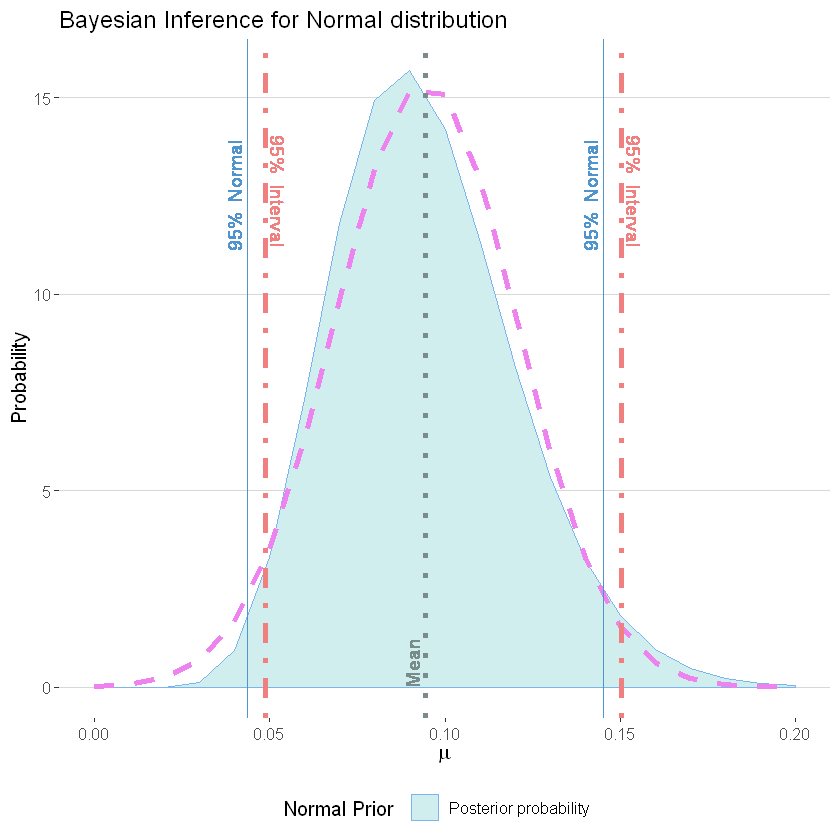

In [27]:
norm <- dnorm(p, post_mean, sqrt(sd2_post) )
df <- data.frame(p, beta_posterior, norm)
g <-ggplot(df, aes(x=p, y = beta_posterior, col = 'Posterior probability')) 
g <- g +  geom_area(fill="lightcyan2")  
g <- g +  labs( y="Probability", x = expression(mu), col = 'Normal Prior')  + xlim(c(0,0.2))
g <- g  +   geom_line(aes(x=p, y =norm, col = 'Normal approximation'), linetype = "dashed", size = 1.5, col  = "violet")
g <- g + ggtitle("Bayesian Inference for Normal distribution")+ theme_hc()+ scale_colour_hc()
g <- g +  geom_vline(xintercept = post_mean, colour="lightcyan4", linetype="dotted", size = 1.5)
g <- g + geom_text(mapping=aes(x=post_mean, y=0,label="Mean"),colour="lightcyan4", size=4, angle=90, vjust=-0.4, hjust=0)
g <- g +  geom_vline(xintercept = lb_norm, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=lb_norm, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g <- g +  geom_vline(xintercept = ub_norm, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=ub_norm, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)

g <- g +  geom_vline(xintercept = lb, colour="lightcoral", linetype="dotdash", size = 1.5)
g <- g + geom_text(mapping=aes(x=lb, y=0,label="95%  Interval"),colour="lightcoral", size=4, angle=270, vjust=-0.4, hjust=5)


g <- g +  geom_vline(xintercept = ub, colour="lightcoral", linetype="dotdash", size = 1.5)
g <- g + geom_text(mapping=aes(x=ub, y=0,label="95%  Interval"),colour="lightcoral", size=4, angle=270, vjust=-0.4, hjust=5)


g

(d) test the hypotesis
    
$H_0 : p=0.1$ versus $H_1 : p \neq 0.1$

at 5% level of significance with both the frequentist and bayesian approach



In [28]:
z <- qnorm(1 - 0.05/2)
sd <- sqrt((p_estimator*(1-p_estimator))/n)

cat(paste("Mean frequentist: "
          ,round(p_estimator,4)," +/-",round(z * sd,4),"\n",sep=""))

lb_norm <- p_estimator - z * sd
ub_norm <- p_estimator + z * sd

cat(paste("Frequentist Approximate normal 95% credible interval with normal approximation: ["
          ,round(lb_norm,4)," ",round(ub_norm,4),"]\n",sep=""))

cat(paste("Bayesian Approximate 95% credible interval for Unif : ["
          ,round(lb,4)," ",round(ub,4),"]\n",sep=""))


Mean frequentist: 0.0948 +/-0.0533
Frequentist Approximate normal 95% credible interval with normal approximation: [0.0415 0.1481]
Bayesian Approximate 95% credible interval for Unif : [0.0488 0.1504]


The null value pi = 0.1 lies in the credible interval, so it remains a credible value at the 5% level of significance

In [29]:
#this can also be validated calculating:
integral <- function(p){dbeta(p, aa, bb)}
p.value.bayesian <- 1 - integrate(integral, 0, 0.1)$value

p.value.freq <- 1 - sum(dbinom(y:n, size = n, 0.1))


cat(paste("p value obtain in the frequentist approach=", p.value.freq, "\n"))

cat(paste("p value obtain in the bayesian approach=", p.value.bayesian))

p value obtain in the frequentist approach= 0.381024574251242 
p value obtain in the bayesian approach= 0.385815030515151

Since the p.value is greater than the confidence interval the hypoteshis is true

A new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter
X level

(e) find the frequentist estimator for p


In [72]:
n <- 165
y <-9

p_estimator <- y/n

cat(paste("The  frequentist estimator for p is "
          ,round(p_estimator,4), "\n",sep=""))

The  frequentist estimator for p is 0.0545



(f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one.



In [73]:
#beta prior Beta(a, b)
p <- seq(0,1, 0.01)
a <- 1
b <- 10

beta_prior <- dbeta(p, a, b)

p.likelihood <- dbinom(x = y, size = n, prob = p)
p.likelihood <- p.likelihood /(0.01 *sum(p.likelihood ))

b_posterior <- p.likelihood * beta_prior# / integrate(beta_, 0, 1)$value
b_posterior <- b_posterior / (0.01*sum(b_posterior))

#wich is nothing else as
aa_beta <- a +y
bb_beta <- b + n - y

beta <- dbeta(p, aa_beta, bb_beta)

#bayesian estimator for p 
p_b <- aa_beta/(aa_beta+bb_beta)

cat(paste("The bayesian estimator for p using B(1, 10) theoretically is "
          ,round(p_b,4), "\n",sep=""))

#which is nothing else as the mean value
post_mean <- sum(p * b_posterior*0.01)#integrate(beta_, 0, 1)$value
cat(paste("The bayesian estimator anallitically is "
          ,round(post_mean,4)))


The bayesian estimator for p using B(1, 10) theoretically is 0.0568
The bayesian estimator anallitically is  0.0568

In [74]:
#old posterior
p <- seq(0,1, 0.01)
a <- 12
b <- 115
#beta_prior <- beta_posterior
beta_prior <- dbeta(p, a, b)

p.likelihood <- dbinom(x = y, size = n, prob = p)
p.likelihood <- p.likelihood /(0.01 *sum(p.likelihood ))

b_posterior_old <- p.likelihood * beta_prior# / integrate(beta_, 0, 1)$value
b_posterior_old <- b_posterior_old / (0.01*sum(b_posterior_old))

#wich is nothing else as
aa_old <- a +y
bb_old <- b + n - y

beta <- dbeta(p, aa_old, bb_old)

#bayesian estimator for p 
p_b <- aa_old/(aa_old+bb_old)

cat(paste("The bayesian estimator for p using the old posterior theoretically is "
          ,round(p_b,4), "\n",sep=""))

#which is nothing else as the mean value
post_mean_old <- sum(p * b_posterior_old*0.01)#integrate(beta_, 0, 1)$value
cat(paste("The bayesian estimator anallitically using the old posterior is "
          ,round(post_mean_old,4)))



The bayesian estimator for p using the old posterior theoretically is 0.0719
The bayesian estimator anallitically using the old posterior is  0.0719

(g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval


In [75]:
var <- sum((p*p*b_posterior*0.01))
sd2_post <- var - post_mean**2

var_old <- sum((p*p*b_posterior_old*0.01))
sd2_post_old <- var_old - post_mean_old**2

cat(paste("The mean value obtained  by the distribution using B(1, 10) is "
          ,round(post_mean,4)," with variance ",round(sd2_post,4),"\n",sep=""))

cat(paste("The mean value obtained  by the distribution using as prior the old posterior is "
          ,round(post_mean_old,4)," with variance ",round(sd2_post_old,4),"\n",sep=""))

The mean value obtained  by the distribution using B(1, 10) is 0.0568 with variance 3e-04
The mean value obtained  by the distribution using as prior the old posterior is 0.0719 with variance 2e-04


In [76]:
z <- qnorm(0.975)
lb_norm <- post_mean - z * sqrt(sd2_post)
ub_norm <- post_mean + z * sqrt(sd2_post)

lb_norm_old <- post_mean_old - z * sqrt(sd2_post_old)
ub_norm_old <- post_mean_old + z * sqrt(sd2_post_old)

cat(paste("Approximate normal 95% credible interval with normal approximation using B(1, 10): ["
          ,round(lb_norm,4)," ",round(ub_norm,4),"]\n",sep=""))


cat(paste("Approximate normal 95% credible interval with normal approximation using as prior the old posterior: ["
          ,round(lb_norm_old,4)," ",round(ub_norm_old,4),"]\n",sep=""))


Approximate normal 95% credible interval with normal approximation using B(1, 10): [0.0227 0.0909]
Approximate normal 95% credible interval with normal approximation using as prior the old posterior: [0.0423 0.1015]


In [77]:
#bayesian
#Calculating the 95% interval
cdf<- sintegral(p, b_posterior)

d<-abs(cdf$y-0.025)
lb<-cdf$x[max((1:length(cdf$y))[d==min(d)])]


d<-abs(cdf$y-0.975)
ub<-cdf$x[min((1:length(cdf$y))[d==min(d)])]

#Calculating the 95% interval
cdf<- sintegral(p, b_posterior_old)

d<-abs(cdf$y-0.025)
lb_old<-cdf$x[max((1:length(cdf$y))[d==min(d)])]


d<-abs(cdf$y-0.975)
ub_old<-cdf$x[min((1:length(cdf$y))[d==min(d)])]


cat(paste("Approximate 95% credible interval for Unif using B(1, 10): ["
          ,round(lb,4)," ",round(ub,4),"]\n",sep=""))

cat(paste("Approximate 95% credible interval for Unif using as prior the old posterior: ["
          ,round(lb_old,4)," ",round(ub_old,4),"]\n",sep=""))

Approximate 95% credible interval for Unif using B(1, 10): [0.0254 0.0957]
Approximate 95% credible interval for Unif using as prior the old posterior: [0.041 0.1035]


Warning message:
"Removed 80 rows containing missing values (position_stack)."Warning message:
"Removed 80 rows containing missing values (geom_path)."

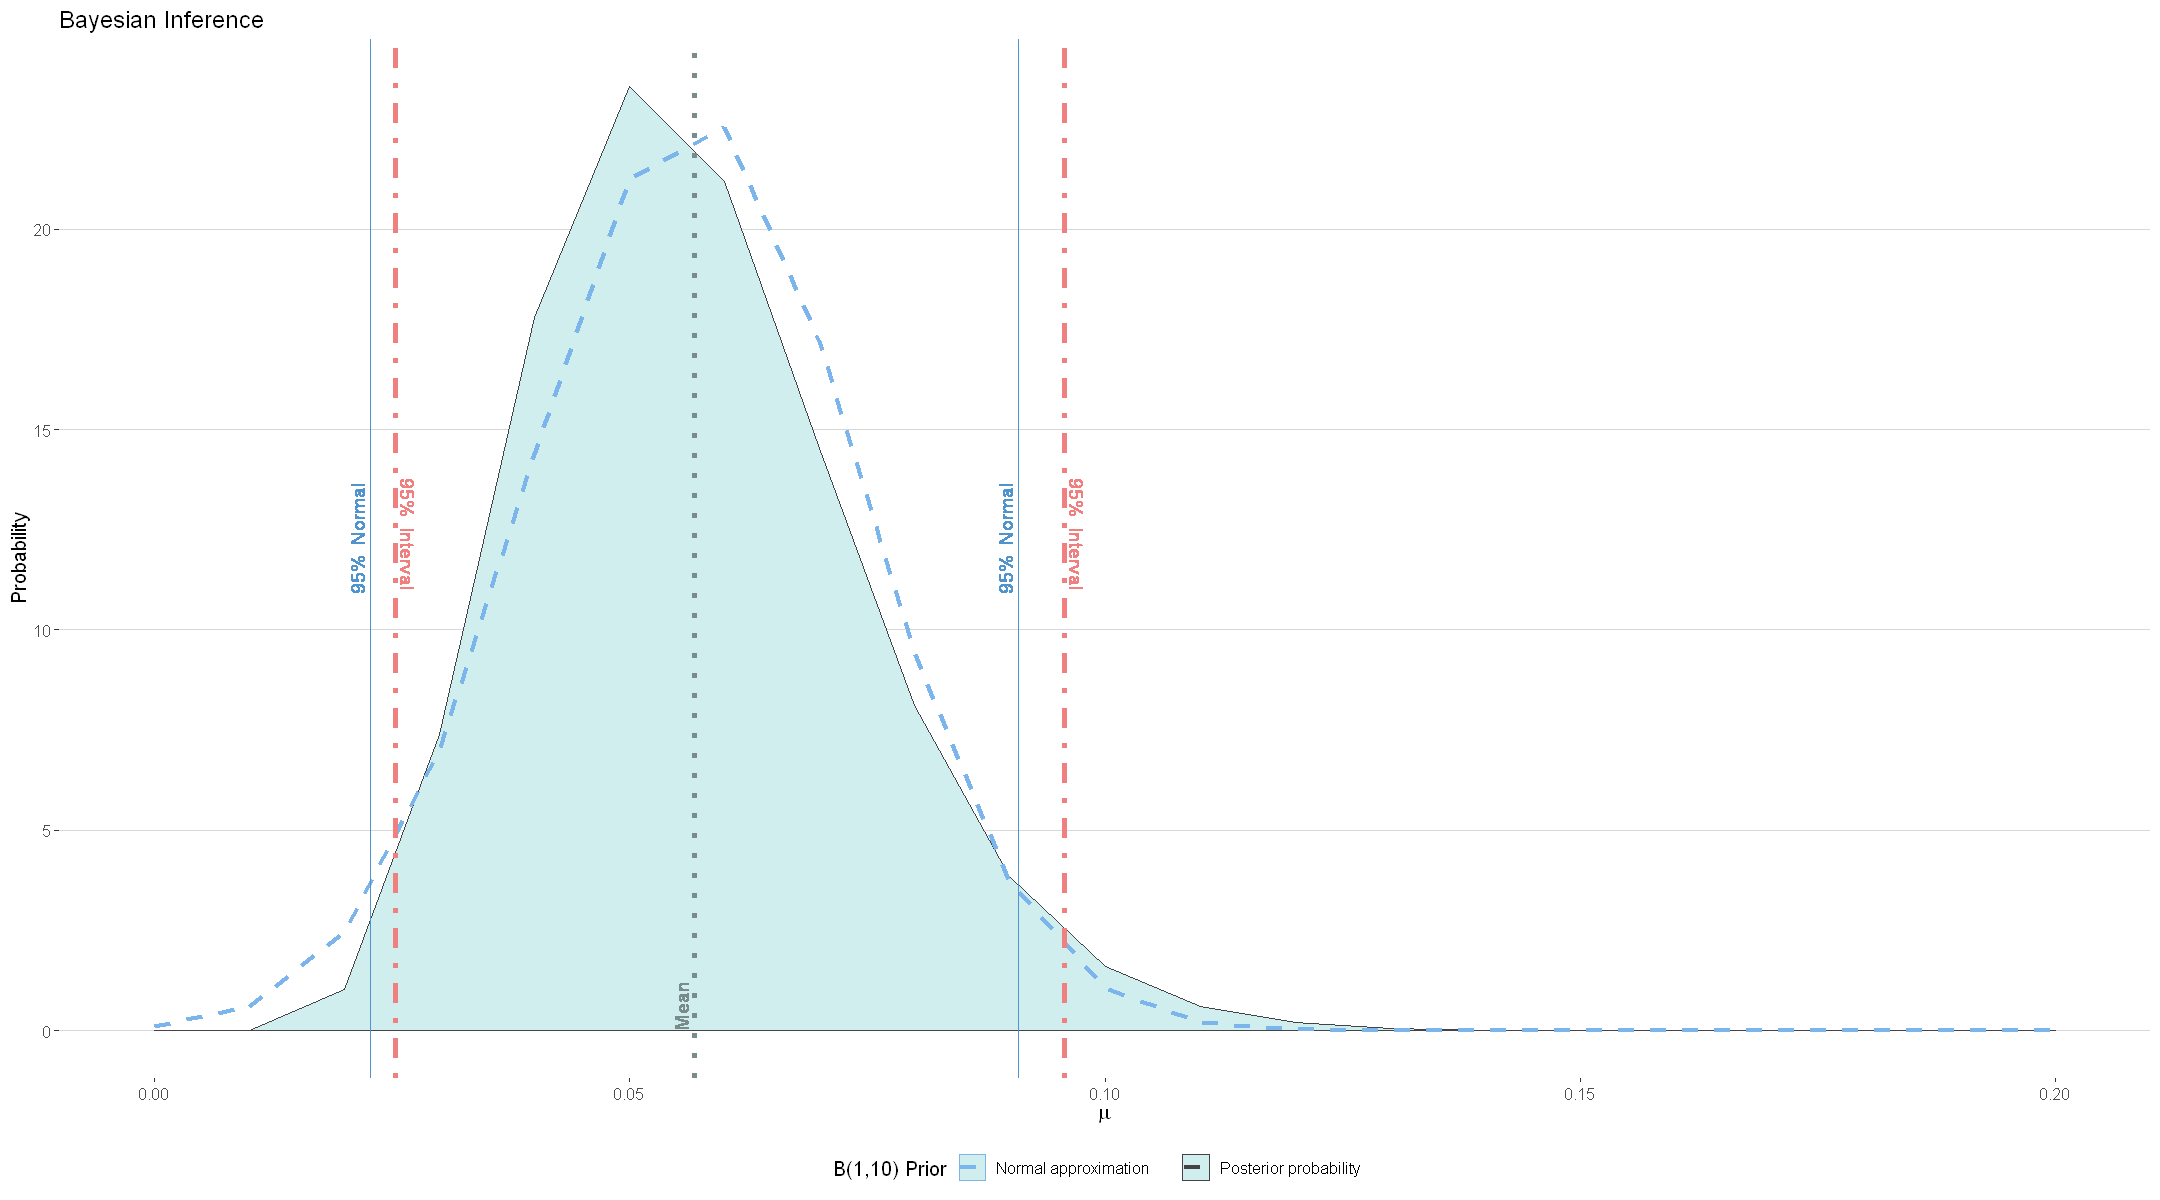

In [78]:
norm <- dnorm(p, post_mean, sqrt(sd2_post) )
df <- data.frame(p, b_posterior, norm)
g <-ggplot(df, aes(x=p, y = b_posterior, col = 'Posterior probability')) 
g <- g +  geom_area(fill="lightcyan2")  
g <- g +  labs( y="Probability", x = expression(mu), col = 'B(1,10) Prior')  + xlim(c(0,0.2))
g <- g  +   geom_line(aes(x=p, y =norm, col = 'Normal approximation'), linetype = "dashed", size = 1.2)
g <- g + ggtitle("Bayesian Inference")+ theme_hc()+ scale_colour_hc()
g <- g +  geom_vline(xintercept = post_mean, colour="lightcyan4", linetype="dotted", size = 1.5)
g <- g + geom_text(mapping=aes(x=post_mean, y=0,label="Mean"),colour="lightcyan4", size=4, angle=90, vjust=-0.4, hjust=0)
g <- g +  geom_vline(xintercept = lb_norm, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=lb_norm, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g <- g +  geom_vline(xintercept = ub_norm, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=ub_norm, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)

g <- g +  geom_vline(xintercept = lb, colour="lightcoral", linetype="dotdash", size = 1.5)
g <- g + geom_text(mapping=aes(x=lb, y=0,label="95%  Interval"),colour="lightcoral", size=4, angle=270, vjust=-0.4, hjust=5)


g <- g +  geom_vline(xintercept = ub, colour="lightcoral", linetype="dotdash", size = 1.5)
g <- g + geom_text(mapping=aes(x=ub, y=0,label="95%  Interval"),colour="lightcoral", size=4, angle=270, vjust=-0.4, hjust=5)


g

Warning message:
"Removed 80 rows containing missing values (position_stack)."Warning message:
"Removed 80 rows containing missing values (geom_path)."

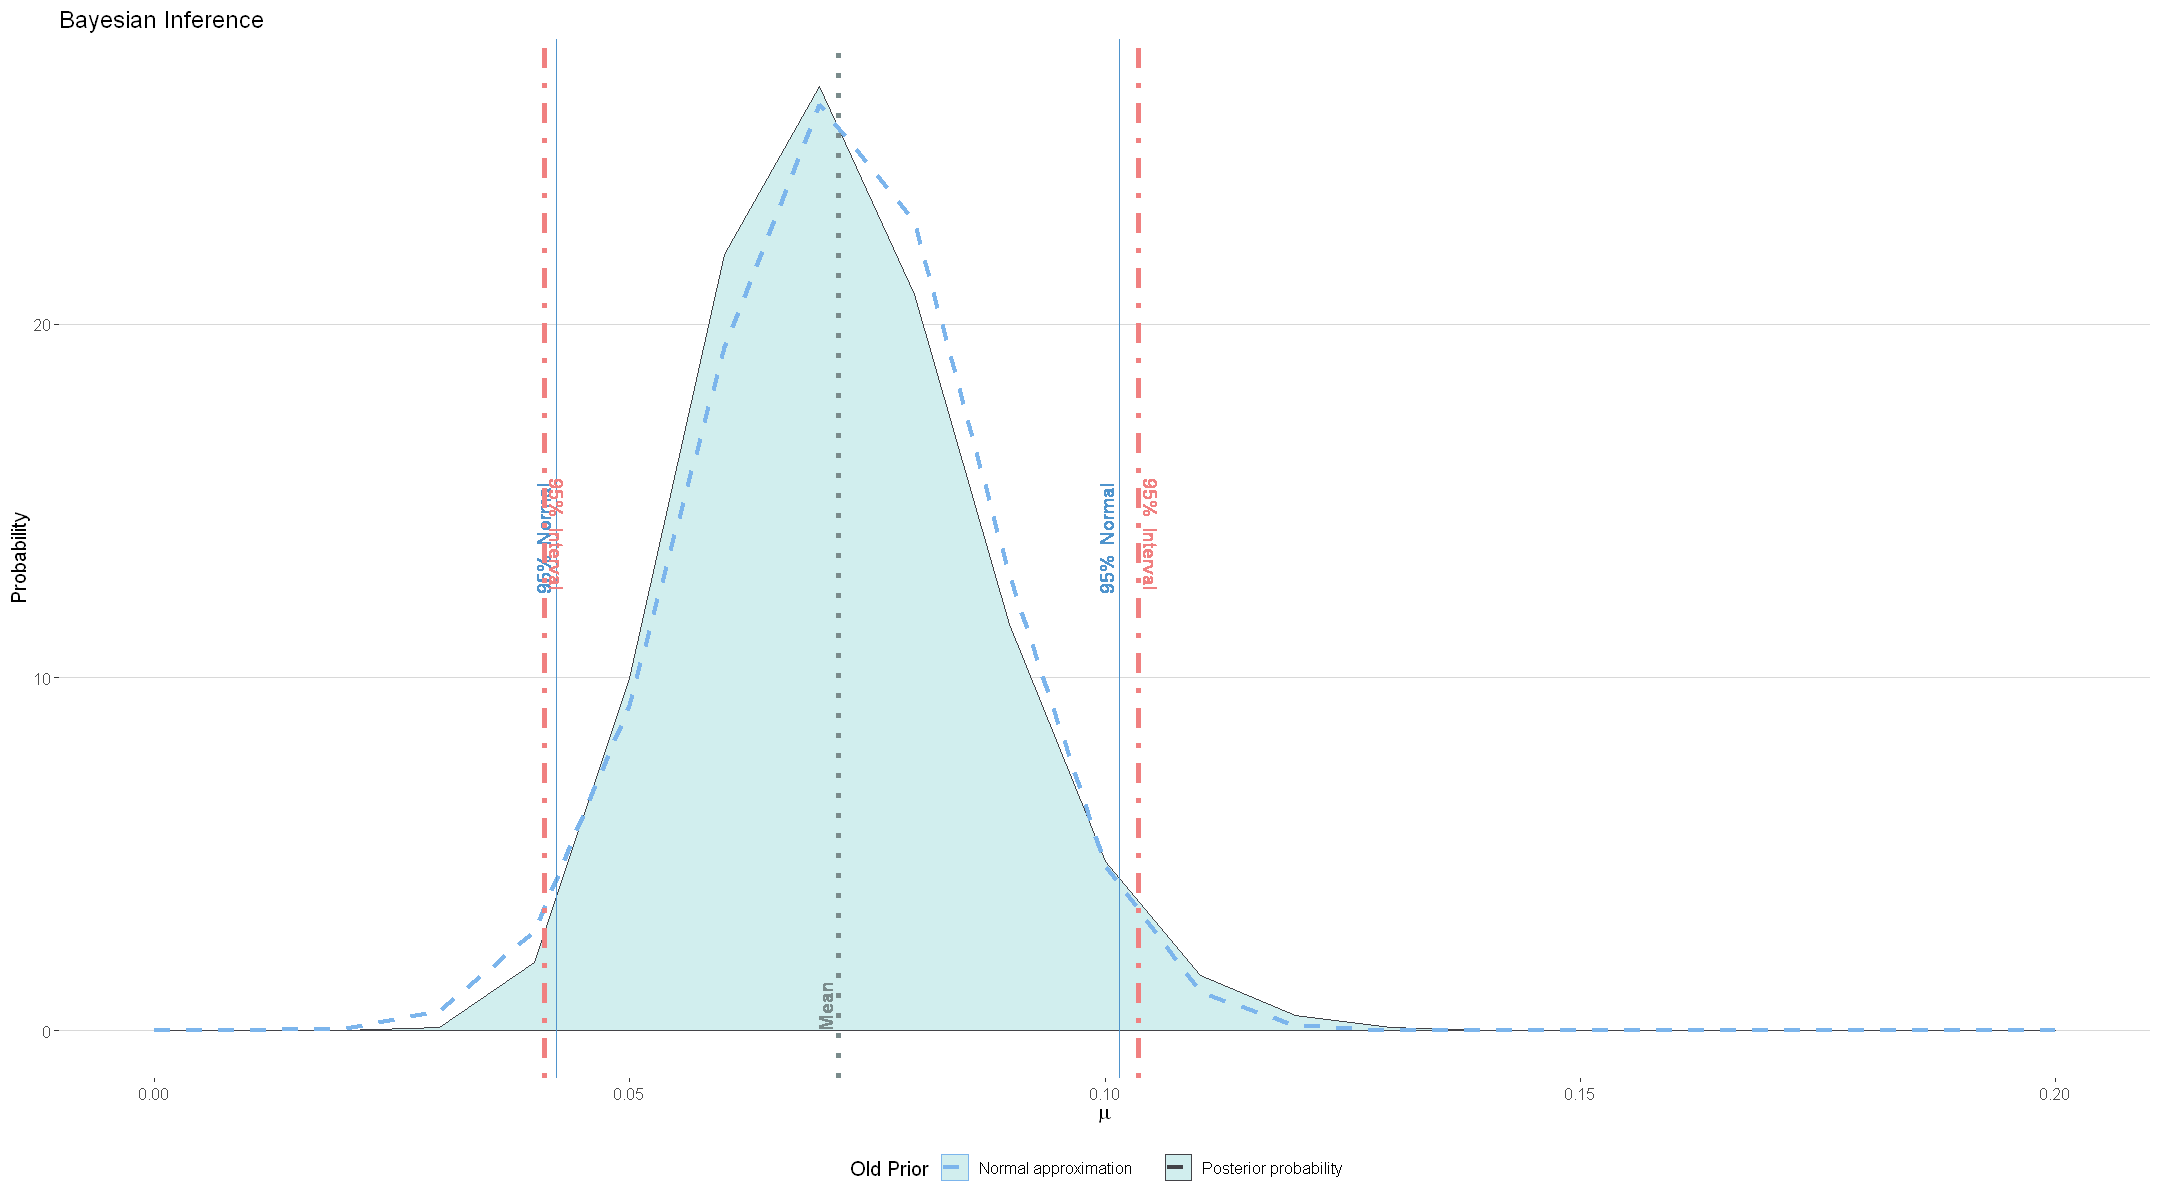

In [79]:
norm <- dnorm(p, post_mean_old, sqrt(sd2_post_old) )
df <- data.frame(p, b_posterior_old, b_posterior, norm)
g <-ggplot(df, aes(x=p, y = b_posterior_old, col = 'Posterior probability')) 
g <- g +  geom_area(fill="lightcyan2")  
g <- g +  labs( y="Probability", x = expression(mu), col = 'Old Prior')  + xlim(c(0,0.2))
g <- g  +   geom_line(aes(x=p, y =norm, col = 'Normal approximation'), linetype = "dashed", size = 1.2)
g <- g + ggtitle("Bayesian Inference")+ theme_hc()+ scale_colour_hc()
g <- g +  geom_vline(xintercept = post_mean_old, colour="lightcyan4", linetype="dotted", size = 1.5)
g <- g + geom_text(mapping=aes(x=post_mean_old, y=0,label="Mean"),colour="lightcyan4", size=4, angle=90, vjust=-0.4, hjust=0)
g <- g +  geom_vline(xintercept = lb_norm_old, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=lb_norm_old, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)
g <- g +  geom_vline(xintercept = ub_norm_old, colour="steelblue3", size = 0.5)
g <- g + geom_text(mapping=aes(x=ub_norm_old, y=0,label="95%  Normal"),colour="steelblue3", size=4, angle=90, vjust=-0.4, hjust=-4)

g <- g +  geom_vline(xintercept = lb_old, colour="lightcoral", linetype="dotdash", size = 1.5)
g <- g + geom_text(mapping=aes(x=lb_old, y=0,label="95%  Interval"),colour="lightcoral", size=4, angle=270, vjust=-0.4, hjust=5)


g <- g +  geom_vline(xintercept = ub_old, colour="lightcoral", linetype="dotdash", size = 1.5)
g <- g + geom_text(mapping=aes(x=ub_old, y=0,label="95%  Interval"),colour="lightcoral", size=4, angle=270, vjust=-0.4, hjust=5)


g

Warning message:
"Removed 80 rows containing missing values (geom_path)."Warning message:
"Removed 80 rows containing missing values (geom_path)."Warning message:
"Removed 80 rows containing missing values (geom_path)."

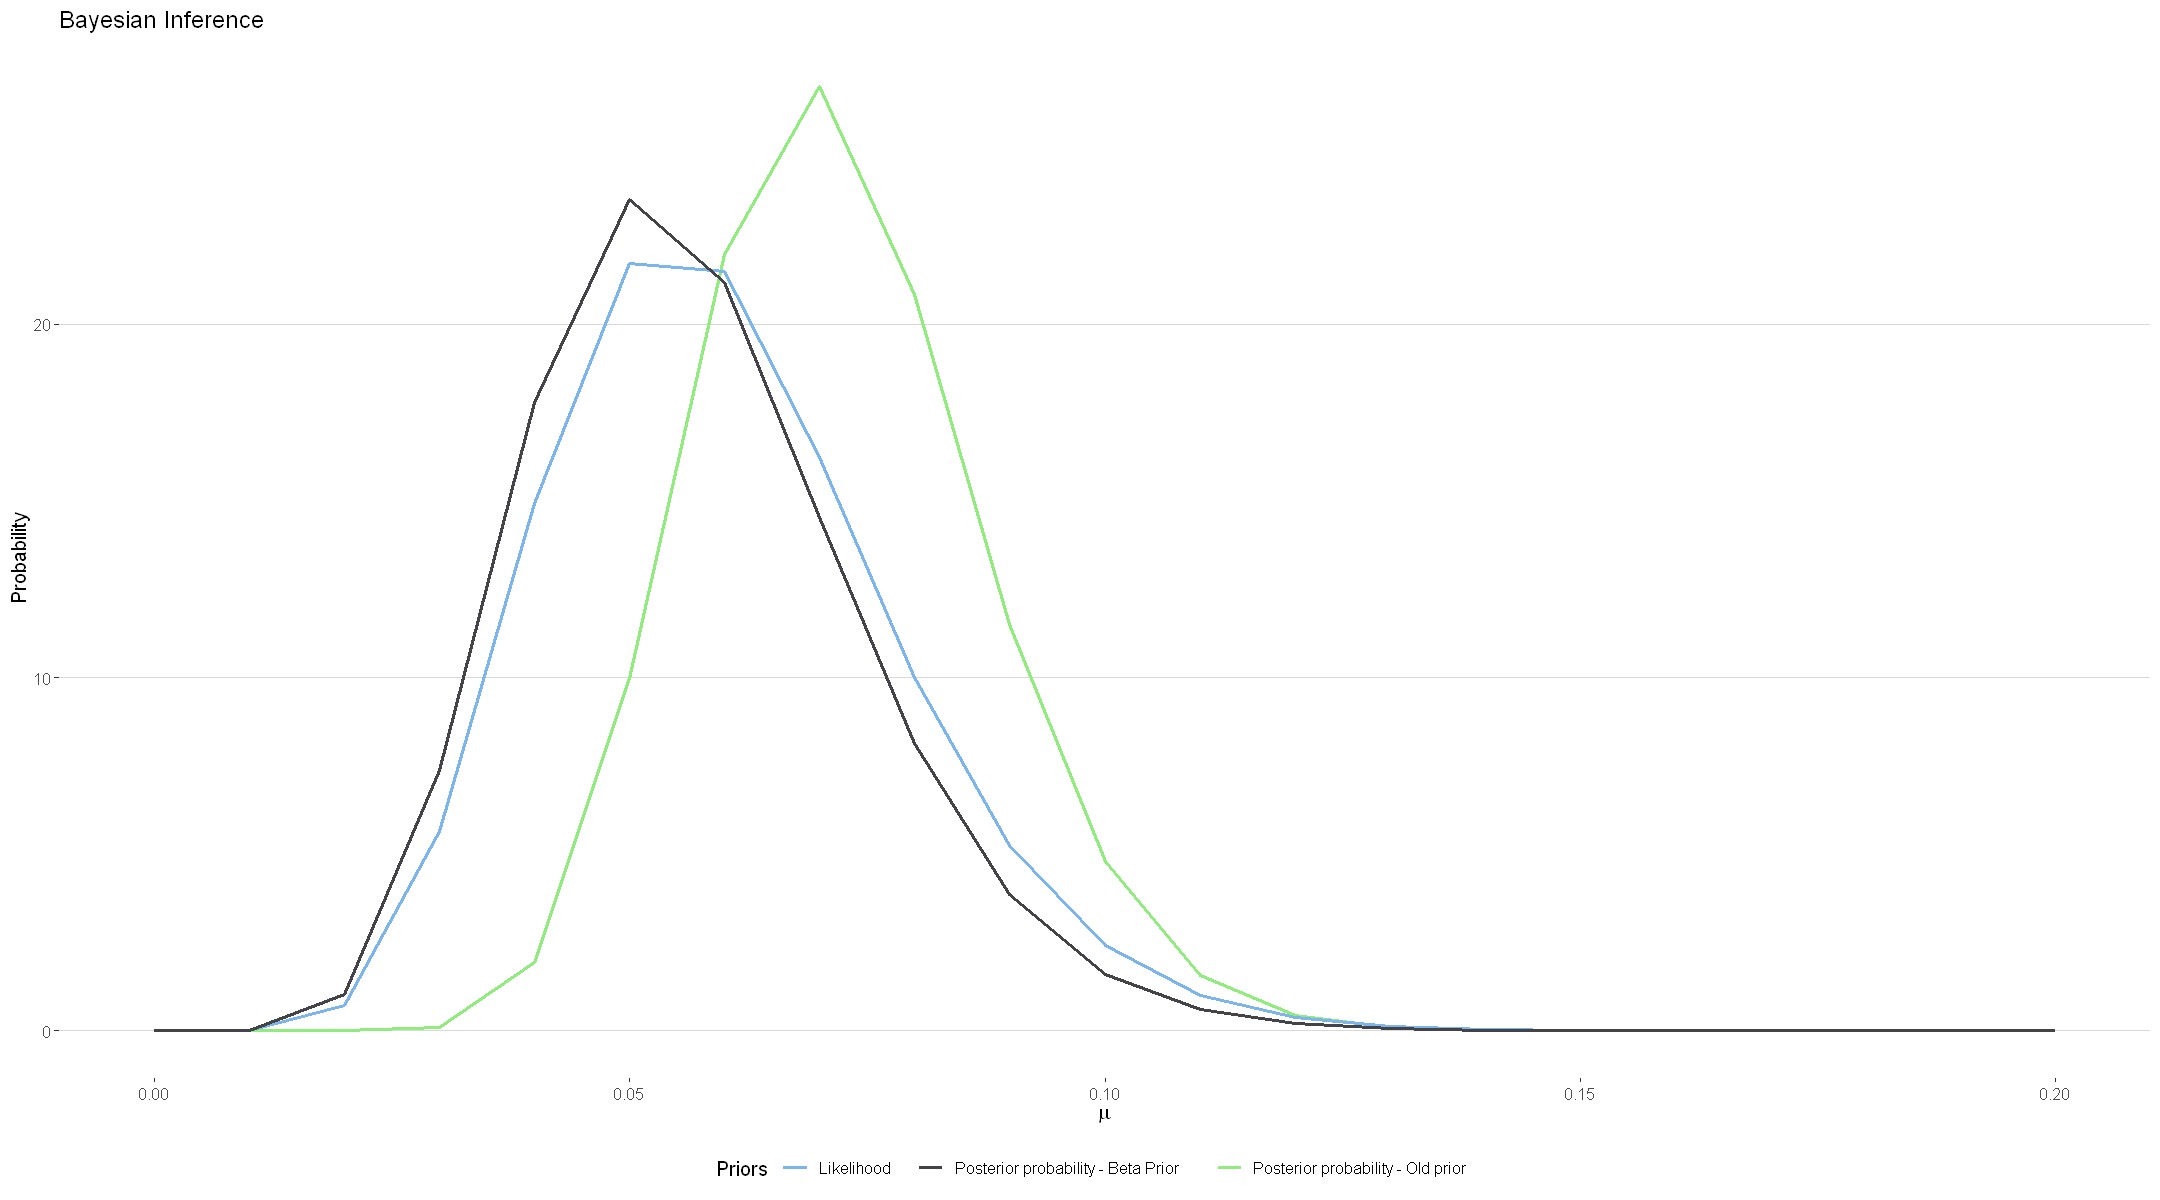

In [80]:
norm <- dnorm(p, post_mean_old, sqrt(sd2_post_old),  p.likelihood)
df <- data.frame(p, b_posterior_old, b_posterior, norm)
g <-ggplot(df, aes(x=p, y = b_posterior_old, col = 'Posterior probability - Old prior')) 
g <- g +  geom_line(size = 1.1)  
g <- g + geom_line(aes(x=p, y =p.likelihood, col = 'Likelihood '),  size = 1.1)
g <- g  +   geom_line(aes(x=p, y =b_posterior, col = 'Posterior probability - Beta Prior'),  size = 1.1)
g <- g + ggtitle("Bayesian Inference")+ theme_hc()+ scale_colour_hc()
g <- g +  labs( y="Probability", x = expression(mu), col =  'Priors')  + xlim(c(0,0.2))

g


(h) test the hypotesis
$H_0 : p=0.1$ versus $H_1 : p \neq 0.1$

at 5% level of significance with both the frequentist and bayesian approach

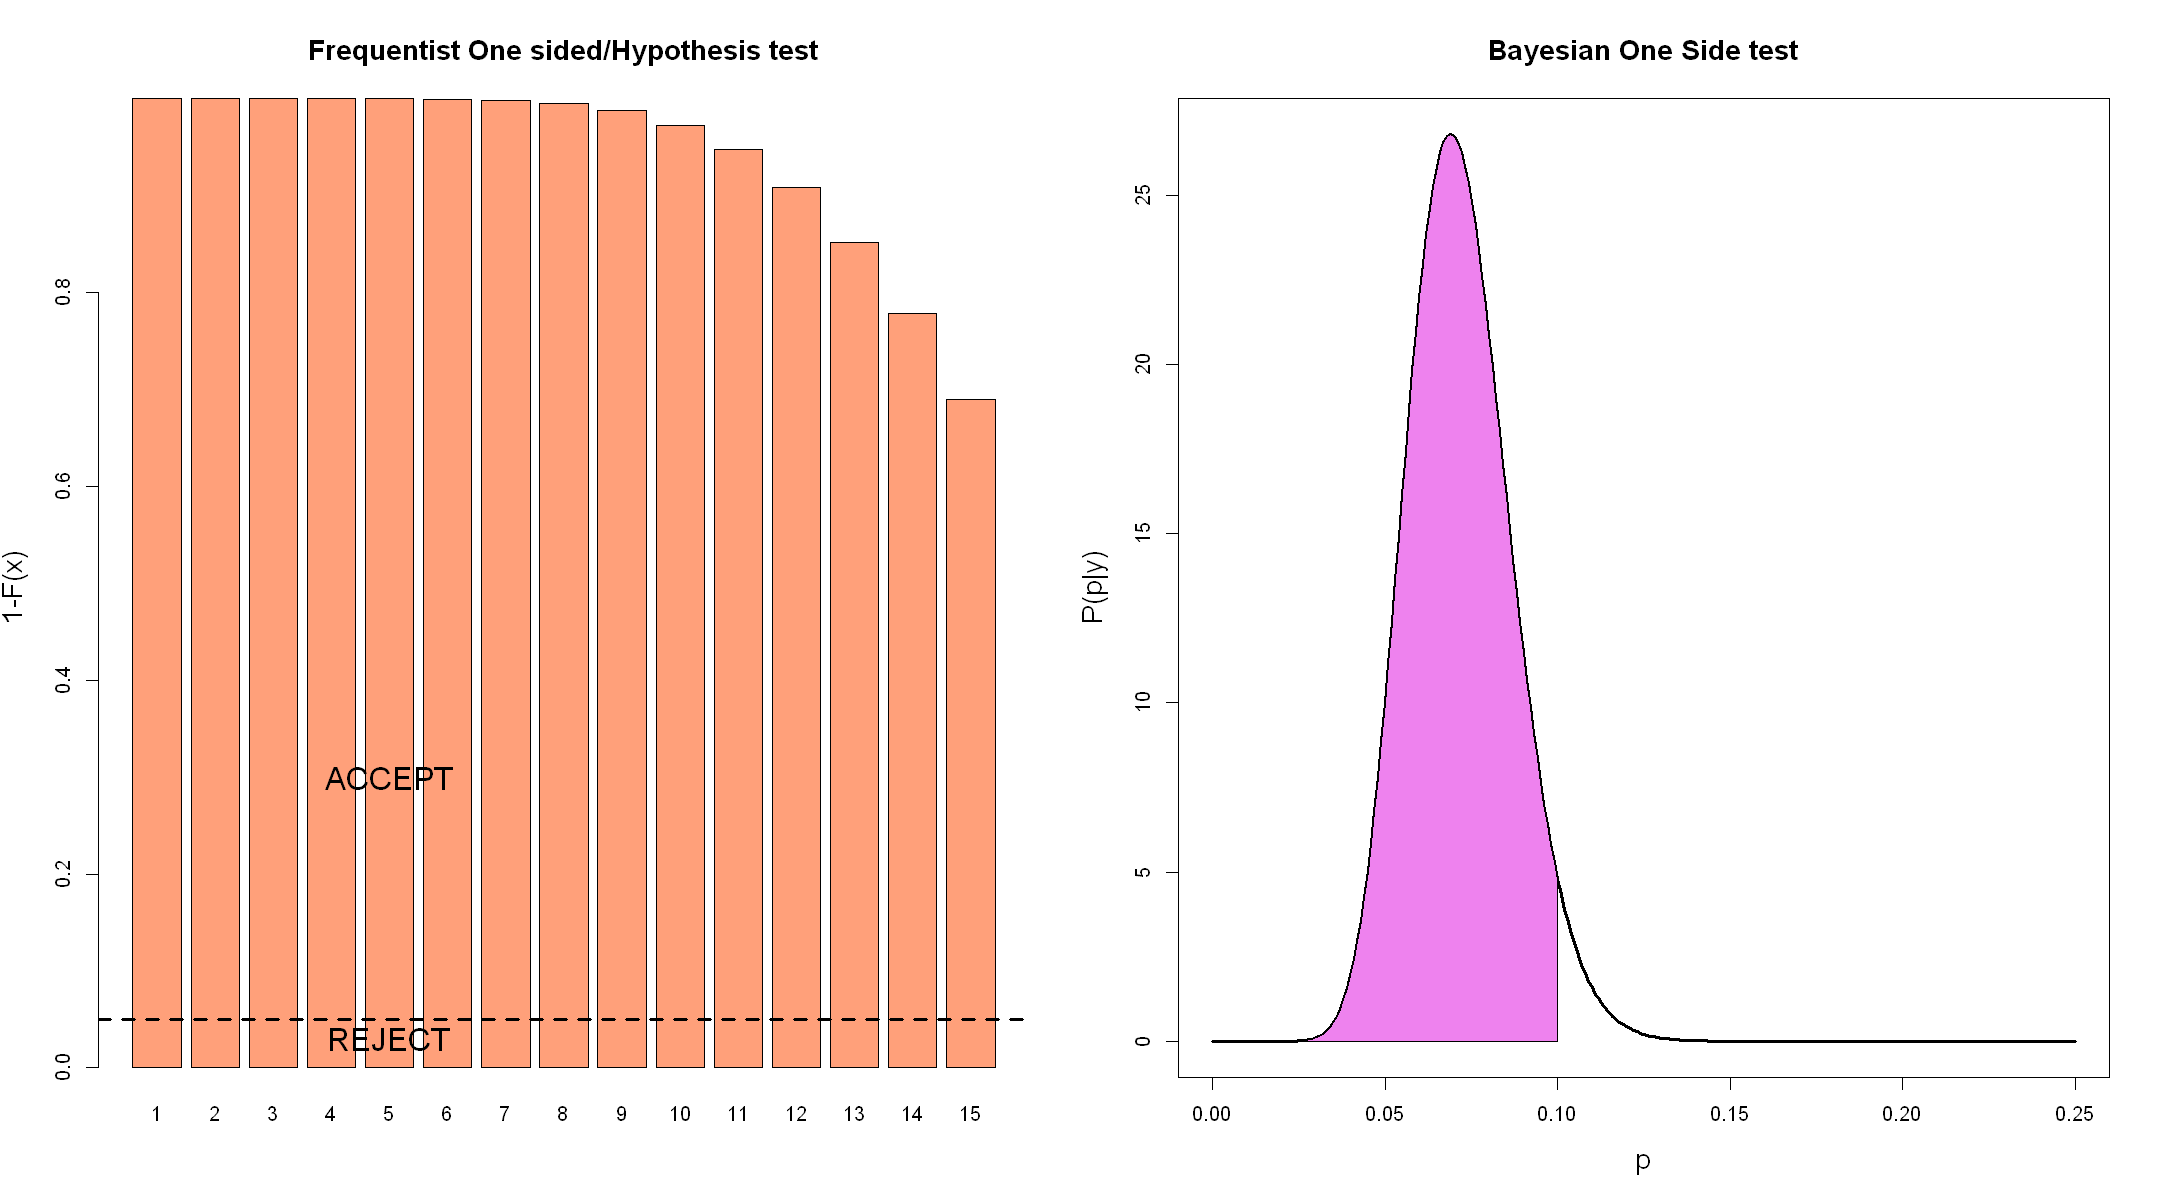

In [70]:
#Let's make some plots
par(mfrow = c(1, 2))
y_list <- c(1:15)
#n <- 116
p0 <- 0.1
freq.vector <- c()
for (y in y_list){
    freq.vector <- append(freq.vector, sum(dbinom(y:n, size = n, 0.1)))
}

barplot(freq.vector, ylab = '1-F(x)', cex.lab = 1.4, main = "Frequentist One sided/Hypothesis test", col ='lightsalmon', names.arg = c(1:15), cex.main =1.4 )

text(5.5,0.3, "ACCEPT", cex = 1.6)

text(5.5,0.03, "REJECT", cex = 1.6)
abline ( h = 0.05, lty = 2, lwd = 3)

p <- seq(0,0.25, 0.001)
post.beta.norm <- dbeta(p, aa_old, bb_old)
plot(p, post.beta.norm, type = 'l', lwd = 3, ylab = 'P(p|y)', cex.lab = 1.4, main = 'Bayesian One Side test', cex.main = 1.4)
polygon(c(p[p <= p0], p0), c(post.beta.norm[p<=p0], 0), col = 'violet')


In [84]:
z <- qnorm(1 - 0.05/2)
sd <- sqrt((p_estimator*(1-p_estimator))/n)

cat(paste("Mean frequentist: "
          ,round(p_estimator,4)," +/-",round(z * sd,4),"\n",sep=""))

lb_norm <- p_estimator - z * sd
ub_norm <- p_estimator + z * sd

cat(paste("Frequentist Approximate normal 95% credible interval with normal approximation: ["
          ,round(lb_norm,4)," ",round(ub_norm,4),"]\n",sep=""))

cat(paste("Bayesian Approximate 95% credible interval for Beta prior : ["
          ,round(lb,4)," ",round(ub,4),"]\n",sep=""))

cat(paste("Bayesian Approximate 95% credible interval for Old posterior : ["
          ,round(lb_old,4)," ",round(ub_old,4),"]\n",sep=""))


Mean frequentist: 0.0545 +/-0.0347
Frequentist Approximate normal 95% credible interval with normal approximation: [0.0199 0.0892]
Bayesian Approximate 95% credible interval for Beta prior : [0.0254 0.0957]
Bayesian Approximate 95% credible interval for Old posterior : [0.041 0.1035]


In [85]:
#this can also be validated calculating:
integral <- function(p){dbeta(p, aa_beta, bb_beta)}
p.value.bayesian_beta <- 1 - integrate(integral, 0, 0.1)$value

integral <- function(p){dbeta(p, aa_old, bb_old)}
p.value.bayesian_old <- 1 - integrate(integral, 0, 0.1)$value


p.value.freq <- 1 - sum(dbinom(y:n, size = n, 0.1))


cat(paste("p value obtain in the frequentist approach=", p.value.freq, "\n"))
cat(paste("p value obtain in the bayesian approach using beta prior=", p.value.bayesian_beta, "\n"))
cat(paste("p value obtain in the bayesian approach using old posterior=", p.value.bayesian_old))

p value obtain in the frequentist approach= 0.0129058536882281 
p value obtain in the bayesian approach using beta prior= 0.0157407707384656 
p value obtain in the bayesian approach using old posterior= 0.0411700785593587

We reject the hypothesis since the p.value is less than the 5% confidence interval. In the case of the bayesian approach using the old posterior, the proability that we reject the hypothesis (or not) should be computed using more data so that we have more certain about the result since the p.value and the confidence interval gives different results.

In [4]:
df <- data.frame(rep(1, 2), rep(5, 2))

In [5]:
df

rep.1..2.,rep.5..2.
1,5
1,5


In [6]:
df[df == 1]

[1] 1 1